# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
# Импортирование нужных библиотек
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
#Открытие файла
try:
    data = pd.read_csv('C:/Users/ReeStick/Desktop/yandex/sprint 3/datasets/real_estate_data.csv', delimiter='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', delimiter='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

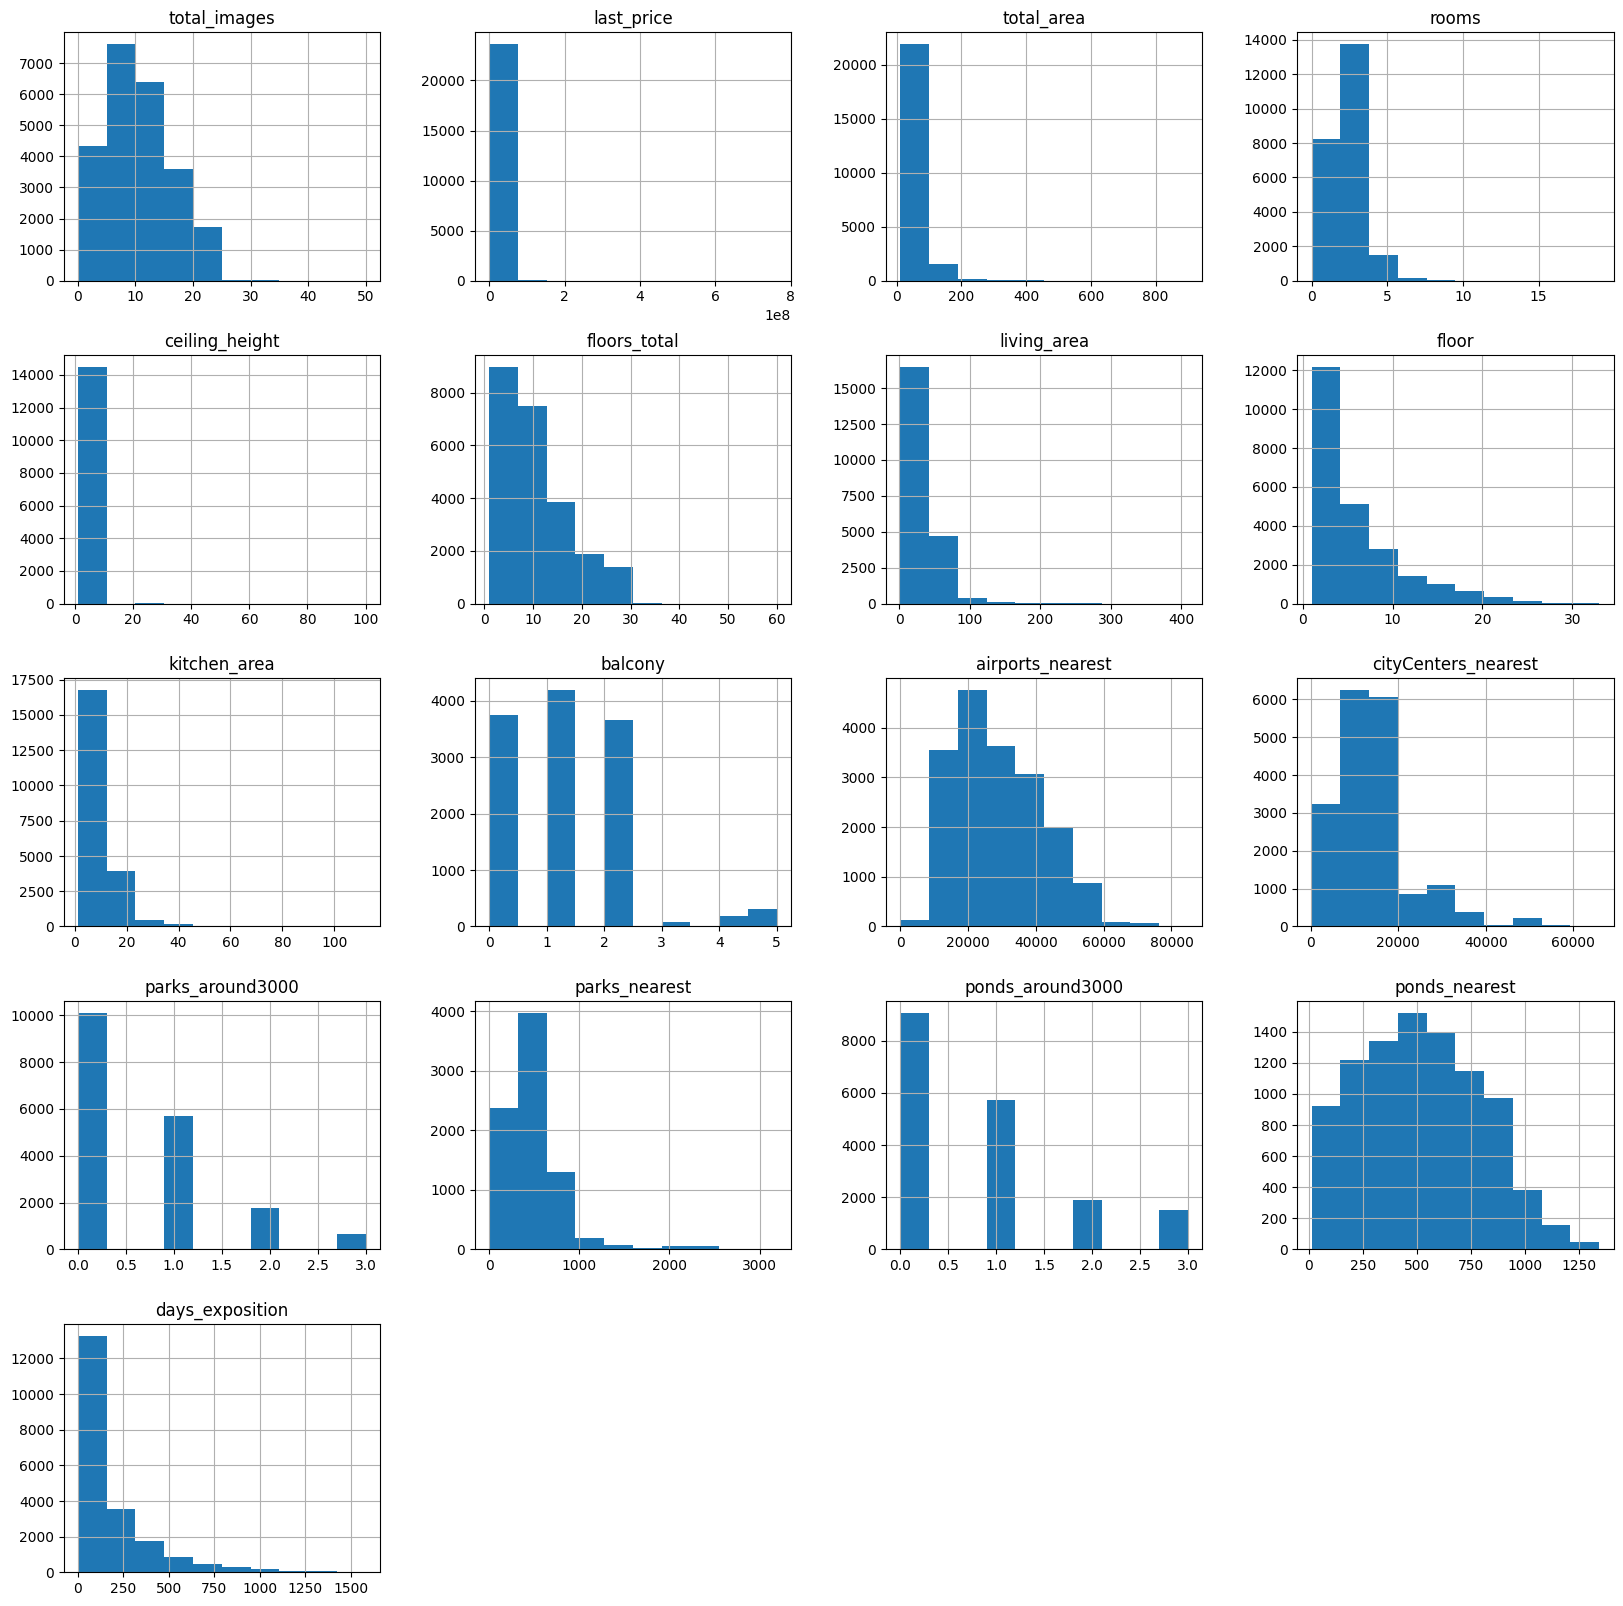

In [4]:
data.hist(figsize=(20, 20))

*Вывод* Многие столбцы имеют аномальное распределение - общая площадь, цена, количество комнат, площадь кухни, и т.д. Также есть столбцы с очень малым количеством данных - ближайший парк, пруд, является ли здание апартаментами.

### 2. Предобработка данных

#### Заполнение пропущеных значений

In [5]:
# Общее количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# Доля пропущенных данных в процентах
data.isna().mean() * 100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

Пропущено очень много значений в is_apartment, parks_nearest, ponds_nearest - 61-88% значений. Скорее всего is_apartment не заполнен ввиду того, что размещающий объявление, имел ввиду что у него жилое помещение, поэтому пропуски можно заполнить значениями False. По остальным 2 столбцам не хватает данных, поэтому пропуски в этих данных не будут заполнены.

In [7]:
data[['ceiling_height', 'living_area', 'kitchen_area']].describe()

,ceiling_height,living_area,kitchen_area
count,14504.000000,21796.000000,21421.000000
mean,2.771499,34.457852,10.569807
std,1.261056,22.030445,5.905438
min,1.000000,2.000000,1.300000
25%,2.520000,18.600000,7.000000
50%,2.650000,30.000000,9.100000
75%,2.800000,42.300000,12.000000
max,100.000000,409.700000,112.000000


Нужно подумать, какие из пропущенных численных значений заполнять медианным значением, какие нулём, а какие - другими значениями. 

* Высота потолков - очень стандартизированая величина, и имеет маленькое отклонение судя по таблице и гистограмме выше, поэтому его можно заполнить медианным значением.
* Жилплощадь, площадь кухни скорее всего сильно зависят от общей площади, поэтому можно рассчитать их из среднего отношения общей площади к жилплощади и площади кухни соответственно.
* Данные о дальности аэропорта и центра города сильно зависят от населённого пункта. Если в СПб медианное значение может быть в 20-30км от центра города, то в каком-нибудь селе, такое попросту невозможно, поэтому лучше оставить эти данные незаполненными.
* Количество этажей в здании сложно заполнить по какому-либо алгоритму, но поскольку пропусков немного, можно просто их исключить из данных
* Количество прудов и парков также сложно заполнить - непонятно, зависят ли они от населённого пункта, от расстояния от центра города, и других параметров, и они также являются картографическими данными, поэтому их тоже оставлю незаполненными.

Количество балконов скорее всего не заполнялось, если балкона не было, поэтому заполним нулями. Пропущеных данных по балконам много - 48%, но это довольно важные данные, поэтому нужно учитывать что этот метод заполнения может повлиять на исследование. Название города - качественные данные, их невозможно заполнить за счёт других данных, но поскольку пропусков немного, их можно отбросить. Число дней для закрытия объявления - важные данные, не зависящие друг от друга, их стоит заполнять только известными значениями, оставлю NaN. Площадь кухни бывает нулевой - например в студиях без кухни, но доля таких квартир невелика, а в данных пропущено 9% значений, поэтому заполню медианными значениями.

In [8]:
# Заполнение медианными данными
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) # Оставлен рассчёт по медиане только для высоты потолков
    
# Заполнение нулевыми данными
data['balcony'] = data['balcony'].fillna(0) # 0.0 -> 0

# Заполнение в зависимости от других столбцов
for column in ['living_area', 'kitchen_area']:
    avg_column_to_total = (data[column] / data['total_area']).mean()
    data[column] = data[column].fillna(data['total_area'] * avg_column_to_total) # Рассчёт жилплощади и площади кухни на основе общей площади

# Заполнение другими данными и удаление пропусков
data = data.dropna(subset=['locality_name', 'floors_total']) # Заполнение 'unknown' -> Удаление пропусков
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False # Не заполнено -> Заполнение False

# Проверка заполнения пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

*Вывод* Незаполненными остались только столбцы is_apartment, park_nearest, ponds_nearest; locality_name заполнен значениями 'unknown', balcony - нулевыми значениями, всё остальное заполнено медианными значениями.

#### Изменение типов данных

Будут изменены типы данных в столбцах: 
- first_day_exposition: object -> datetime, для более удобной работы с форматом дат
- floors_total, balcony: float64 -> int64, все столбцы из перечисленных могут принимать только целочисленные значения, иначе данные будут некорректными.
- is_apartment: object -> bool, значение булевое по условию.

Также нужно изменить название cityCenters_nearest - оно написано не в snake_case.

In [9]:
# object -> datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], 
                                              format='%Y-%m-%dT%H:%M:%S')

# float -> int
data[['floors_total', 'balcony']] = data[['floors_total', 'balcony']].astype('int') # Изменена запись
    
# object -> bool
data['is_apartment'] = data['is_apartment'].astype('bool')

# Изменение названия столбца
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

# Проверка преобразования
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int32         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony              

*Вывод* Осталось только один строковый столбец - название населённого пункта, другие два стали булевым значением и datetime. Также к целочисленному значению были приведены столбцы, данные в которых могут быть только целочисленными. Также, столбцы были приведены к snake_case.

#### Устранение дубликатов

In [10]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

В данных можно оставить только названия населённых пунктов с заменой ё на е, это должно удалить все неявные дубликаты.

In [11]:
data['clean_locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(r'\b[а-я]+\s', '', regex=True)
) 

data['clean_locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпоселок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

In [12]:
data['locality_name'].sort_values().unique().__len__() - data['clean_locality_name'].sort_values().unique().__len__()

59

*Вывод* Было заменено 59 неявных дубликатов.

#### Вывод

Была проведена работа над данными: удаление дубликатов, заполнение пропусков, а также изменены некоторые типы столбцов

### 3. Посчитайте и добавьте в таблицу новые столбцы

In [13]:
# Цена за квадратный метр
data['price_per_square_metre'] = round(data['last_price'] / data['total_area'], 2) # Добавлено округление

In [14]:
data['price_per_square_metre'].describe()

count    2.356500e+04
mean     9.940584e+04
std      5.038943e+04
min      1.118300e+02
25%      7.656613e+04
50%      9.500000e+04
75%      1.142132e+05
max      1.907500e+06
Name: price_per_square_metre, dtype: float64

In [15]:
# День недели, месяц, год выставления квартиры на торги
data['weekday'] = data['first_day_exposition'].dt.dayofweek
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [16]:
# Функция для определения типа этажа
# def floor_type(floor, max_floor):
#     if floor == 1:
#         return 'первый'
#     elif floor == max_floor:
#         return 'последний'
#     return 'другой'

In [17]:
data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'последний'
data['floor_type'] = data['floor_type'].fillna('другой') # Переписано на loc и fillna вместо apply

In [18]:
# Расстояние до центра города
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)

In [19]:
# Проверка добавленных столбцов
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name,price_per_square_metre,weekday,month,year,floor_type,city_centers_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,2.0,755.0,NaN,Санкт-Петербург,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600000,1,False,...,0.0,NaN,81.0,Шушары,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4,False,...,2.0,574.0,558.0,Санкт-Петербург,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,89.797718,9,False,...,3.0,234.0,424.0,Санкт-Петербург,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.000000,13,False,...,1.0,48.0,121.0,Санкт-Петербург,100000.00,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5,False,...,NaN,NaN,55.0,Янино-1,95065.79,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.600000,6,False,...,0.0,NaN,155.0,Парголово,99195.71,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,40.437211,22,False,...,0.0,NaN,NaN,Санкт-Петербург,110544.69,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.430000,26,False,...,NaN,NaN,189.0,Мурино,87454.76,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,0.0,NaN,289.0,Санкт-Петербург,88524.59,6,2,2017,другой,15.0


*Вывод* Было добавлено 6 новых столбцов для дальнейшего анализа данных

### 4. Проведите исследовательский анализ данных

#### 4.1. Изучение и описание параметров в таблице, исправление аномальных значений.

##### Общая площадь

Общая площадь, это площадь, которую занимает жильё. Соответственно оно положительное, и находится в районе 60 $м^2$ для двухкомнатных квартир и 86 $м^2$ для трёхкомнатных.

<Axes: >

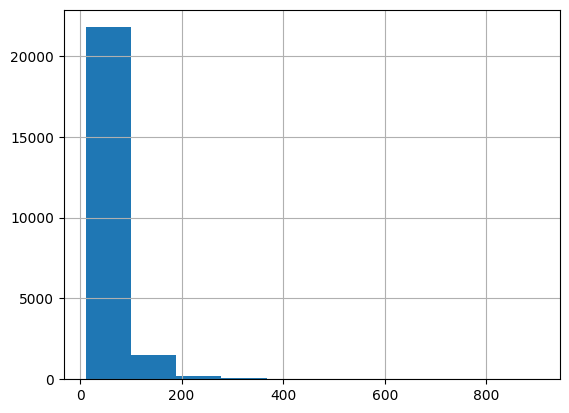

In [20]:
data['total_area'].hist()

In [21]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

In [22]:
data.sort_values(['total_area'], ascending=False).head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name,price_per_square_metre,weekday,month,year,floor_type,city_centers_nearest_km
19540,8,420000000.0,900.00,2017-12-06,12,2.80,25,409.700000,25,False,...,2.0,318.0,106.0,Санкт-Петербург,466666.67,2,12,2017,последний,8.0
12859,20,140000000.0,631.20,2019-04-09,7,3.90,4,322.300000,4,False,...,2.0,210.0,NaN,Санкт-Петербург,221799.75,1,4,2019,последний,5.0
3117,19,140000000.0,631.00,2019-03-30,7,2.65,5,356.367044,5,False,...,2.0,210.0,NaN,Санкт-Петербург,221870.05,5,3,2019,последний,5.0
15651,20,300000000.0,618.00,2017-12-18,7,3.40,7,258.000000,5,False,...,2.0,198.0,111.0,Санкт-Петербург,485436.89,0,12,2017,другой,5.0
5358,20,65000000.0,590.00,2019-02-14,15,3.50,6,409.000000,3,False,...,0.0,NaN,14.0,Санкт-Петербург,110169.49,3,2,2019,другой,5.0
4237,1,50000000.0,517.00,2017-10-14,7,2.65,4,332.000000,3,False,...,2.0,540.0,NaN,Санкт-Петербург,96711.80,5,10,2017,другой,2.0
8018,20,84000000.0,507.00,2015-12-17,5,4.45,7,301.500000,7,True,...,0.0,NaN,1078.0,Санкт-Петербург,165680.47,3,12,2015,последний,6.0
15016,8,150000000.0,500.00,2016-01-13,4,3.20,7,282.382761,7,False,...,3.0,531.0,303.0,Санкт-Петербург,300000.00,2,1,2016,последний,6.0
5893,3,230000000.0,500.00,2017-05-31,6,2.65,7,282.382761,7,False,...,2.0,198.0,50.0,Санкт-Петербург,460000.00,2,5,2017,последний,5.0
12401,20,91500000.0,495.00,2017-06-19,7,4.65,7,347.500000,7,False,...,0.0,NaN,14.0,Санкт-Петербург,184848.48,0,6,2017,последний,6.0


Половина значений находятся в диапазоне 12-69 $м^2$. Хоть значения больше 400 и выглядят необычно, в основном стоимость квадратного метра находятся в диапазоне 100-400 тыс. При этом видно огромное значение в почти 2 млн руб/$м^2$. Неизвестно что это за жилое помещение, стоимость в 763 млн рублей выглядит несколько подозрительно, при том что помещение продано за 33 дня.

In [23]:
data.sort_values(['total_area'], ascending=False).tail(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name,price_per_square_metre,weekday,month,year,floor_type,city_centers_nearest_km
17860,1,2385000.0,20.00,2018-12-11,1,2.65,6,11.295310,2,False,...,1.0,1002.0,25.0,Санкт-Петербург,119250.00,1,12,2018,другой,3.0
5312,3,1800000.0,20.00,2018-02-01,0,2.65,19,16.000000,10,False,...,NaN,NaN,53.0,Кудрово,90000.00,3,2,2018,другой,NaN
8873,6,2950000.0,20.00,2016-06-18,1,2.65,7,14.000000,1,False,...,0.0,NaN,38.0,Санкт-Петербург,147500.00,5,6,2016,первый,5.0
5855,3,945750.0,19.50,2017-09-18,0,2.76,3,12.700000,2,False,...,NaN,NaN,3.0,Дубровка,48500.00,0,9,2017,другой,NaN
8454,7,2250000.0,19.00,2019-03-12,0,3.00,6,10.730545,2,False,...,3.0,374.0,44.0,Санкт-Петербург,118421.05,1,3,2019,другой,7.0
9817,8,2190000.0,19.00,2018-10-12,0,3.50,5,15.000000,1,False,...,1.0,781.0,89.0,Санкт-Петербург,115263.16,4,10,2018,первый,8.0
23191,3,1900000.0,18.90,2016-04-04,1,2.65,16,16.000000,12,False,...,NaN,NaN,115.0,Тосно,100529.10,0,4,2016,другой,NaN
8755,1,1350000.0,18.80,2017-11-22,0,2.75,19,15.800000,1,False,...,1.0,1127.0,128.0,Санкт-Петербург,71808.51,2,11,2017,первый,14.0
12881,5,1500000.0,18.50,2017-12-13,1,2.65,5,10.448162,5,False,...,NaN,NaN,41.0,Сосновый Бор,81081.08,2,12,2017,последний,NaN
8729,9,2200000.0,18.40,2018-08-20,1,2.52,3,14.000000,3,False,...,1.0,155.0,59.0,Пушкин,119565.22,0,8,2018,последний,31.0


При малых значениях всё выглядит нормально

В общей площади изменений по данным не было.

##### Жилая площадь

Жилая площадь - это площадь для обычной жизни. Её составляет площадь не относящаяся к кухне, ванной и т.д., соответственно она составляет примерно от 25% площади до 75% жилья.

<Axes: >

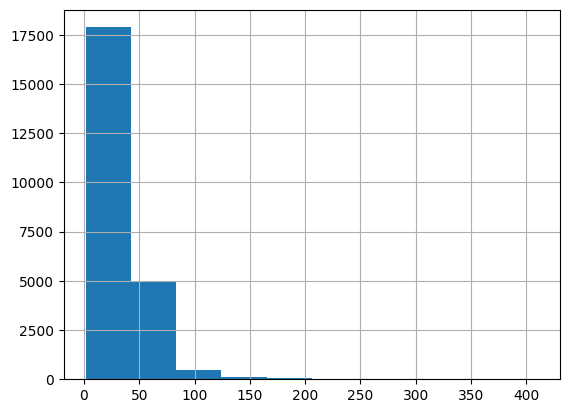

In [24]:
data['living_area'].hist()

In [25]:
data['living_area'].describe()

count    23565.000000
mean        34.560141
std         22.345289
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

In [26]:
data.sort_values(['living_area'], ascending=False).head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name,price_per_square_metre,weekday,month,year,floor_type,city_centers_nearest_km
19540,8,420000000.0,900.00,2017-12-06,12,2.80,25,409.700000,25,False,...,2.0,318.0,106.0,Санкт-Петербург,466666.67,2,12,2017,последний,8.0
5358,20,65000000.0,590.00,2019-02-14,15,3.50,6,409.000000,3,False,...,0.0,NaN,14.0,Санкт-Петербург,110169.49,3,2,2019,другой,5.0
3117,19,140000000.0,631.00,2019-03-30,7,2.65,5,356.367044,5,False,...,2.0,210.0,NaN,Санкт-Петербург,221870.05,5,3,2019,последний,5.0
12401,20,91500000.0,495.00,2017-06-19,7,4.65,7,347.500000,7,False,...,0.0,NaN,14.0,Санкт-Петербург,184848.48,0,6,2017,последний,6.0
4237,1,50000000.0,517.00,2017-10-14,7,2.65,4,332.000000,3,False,...,2.0,540.0,NaN,Санкт-Петербург,96711.80,5,10,2017,другой,2.0
12859,20,140000000.0,631.20,2019-04-09,7,3.90,4,322.300000,4,False,...,2.0,210.0,NaN,Санкт-Петербург,221799.75,1,4,2019,последний,5.0
660,3,49950000.0,483.90,2017-10-04,7,3.20,6,312.500000,4,False,...,3.0,22.0,391.0,Санкт-Петербург,103223.81,2,10,2017,другой,1.0
8018,20,84000000.0,507.00,2015-12-17,5,4.45,7,301.500000,7,True,...,0.0,NaN,1078.0,Санкт-Петербург,165680.47,3,12,2015,последний,6.0
14088,8,51000000.0,402.00,2017-02-07,6,3.15,8,300.000000,6,False,...,0.0,NaN,32.0,Санкт-Петербург,126865.67,1,2,2017,другой,5.0
15016,8,150000000.0,500.00,2016-01-13,4,3.20,7,282.382761,7,False,...,3.0,531.0,303.0,Санкт-Петербург,300000.00,2,1,2016,последний,6.0


В основном значения нормальные, не считая случаев, где общая площадь меньше жилплощади. Это явная ошибка в записи, нужно проверить сколько таких данных

In [27]:
data[data['total_area'] < data['living_area']]['living_area'].count()

0

Всего 4 значения, их можно удалить.

In [28]:
data = data.loc[data['total_area'] >= data['living_area']]
data[data['total_area'] < data['living_area']]['living_area'].count() # Проверка

0

Может быть, что такая проблема относится и к площади кухни, нужно проверить

In [29]:
data[data['total_area'] < data['kitchen_area']]['kitchen_area'].count()

0

Так и есть, эти значения тоже надо удалить, поскольку их немного

In [30]:
data = data.loc[data['total_area'] >= data['kitchen_area']]
data[data['total_area'] < data['kitchen_area']]['kitchen_area'].count() # Проверка

0

In [31]:
data.sort_values(['living_area'], ascending=False).tail(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,clean_locality_name,price_per_square_metre,weekday,month,year,floor_type,city_centers_nearest_km
22356,6,2050000.0,17.20,2019-01-13,1,2.77,23,9.713967,1,False,...,0.0,NaN,7.0,Санкт-Петербург,119186.05,6,1,2019,первый,14.0
22473,0,3490304.0,33.26,2015-12-22,2,2.65,13,9.100000,9,False,...,0.0,NaN,199.0,Санкт-Петербург,104939.99,1,12,2015,другой,13.0
4100,17,5300000.0,34.80,2017-06-19,1,2.70,23,9.000000,15,False,...,0.0,NaN,30.0,Санкт-Петербург,152298.85,0,6,2017,другой,13.0
15833,20,4600000.0,33.00,2017-01-01,1,2.70,22,9.000000,12,False,...,0.0,NaN,511.0,Санкт-Петербург,139393.94,6,1,2017,другой,14.0
22252,4,3340000.0,37.40,2018-02-08,1,2.80,8,9.000000,4,False,...,0.0,NaN,233.0,Санкт-Петербург,89304.81,3,2,2018,другой,19.0
680,14,7200000.0,43.00,2017-10-31,1,2.65,8,9.000000,2,False,...,1.0,933.0,296.0,Санкт-Петербург,167441.86,1,10,2017,другой,5.0
19620,10,4300000.0,33.00,2018-02-01,1,2.65,5,9.000000,1,False,...,3.0,220.0,86.0,Санкт-Петербург,130303.03,3,2,2018,первый,3.0
7312,8,3400000.0,27.00,2018-02-21,2,2.50,15,9.000000,4,False,...,0.0,NaN,NaN,Санкт-Петербург,125925.93,2,2,2018,другой,16.0
4542,12,3300000.0,18.00,2018-11-07,1,3.50,5,9.000000,2,False,...,1.0,963.0,9.0,Санкт-Петербург,183333.33,2,11,2018,другой,5.0
1326,8,8100000.0,52.00,2017-01-29,2,2.70,25,9.000000,15,False,...,1.0,1180.0,337.0,Санкт-Петербург,155769.23,6,1,2017,другой,16.0


Здесь есть крайне низкие значения жилплощади по отношению к общей площади - отношение в некоторых случаях меньше чем 1 к 10. Стоит проверить, сколько значений с отношением больше чем 1 к 8.

In [32]:
data[data['total_area'] / data['living_area'] > 8]['living_area'].count()

5

Значений относительно немало, для такого критического условия, скорее всего это реальные значения

##### Цена объекта

Цена жилья в Питере за трёхкомнтаную квартиру в среднем - 10 млн рублей.

<Axes: >

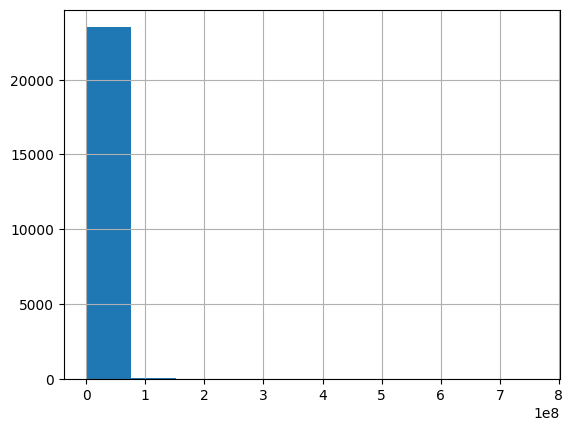

In [33]:
data['last_price'].hist() # 100_000_000 это 1е8

In [34]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

760 млн рублей за квартиру - это отличие на целых 2 порядка от третьего квартиля. Возможно, стоит отбросить настолько дорогие квартиры при исследовании, и остановиться на квартирах со стоимостью менее 20 млн. Квартиры за 12 тысяч рублей также не внушают доверия. Скорее всего это месячная стоимость аренды, так что включать их в исследование не следует. Ограничу нижнюю границу в 250 тыс.

<Axes: >

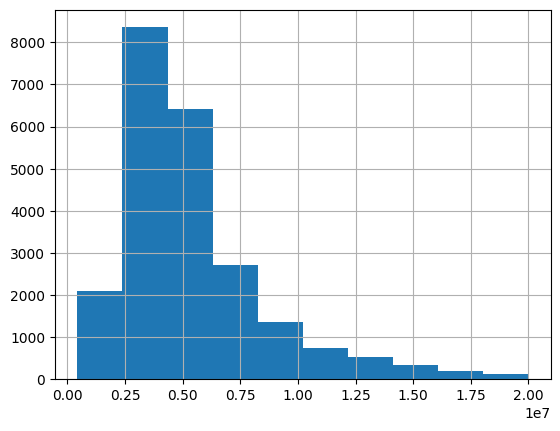

In [35]:
data = data.query('last_price < 20_000_000 and last_price > 250_000')
data['last_price'].hist()

##### Количество комнат

Чаще всего продаются студии и 1-3 комнатные квартиры

<Axes: >

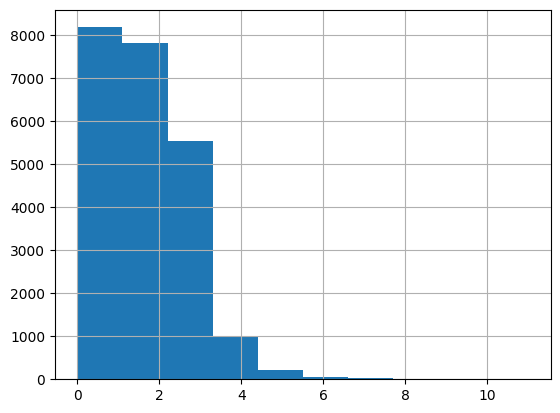

In [36]:
data['rooms'].hist()

In [37]:
data['rooms'].describe()

count    22844.000000
mean         2.009237
std          0.984782
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

По комнатам не наблюдается каких то необычных данных. Как было описано ранее - 0 комнат, скорее всего, обозначают студию, поэтому это нормальное значение.

##### Высота потолков

В центре Питера есть квартиры с высокими потолками до 4 метров.

<Axes: >

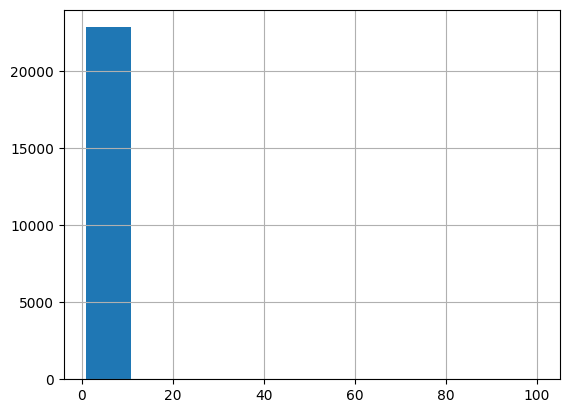

In [38]:
data['ceiling_height'].hist()

In [39]:
data['ceiling_height'].describe()

count    22844.000000
mean         2.714803
std          1.001975
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [40]:
data['ceiling_height'].sort_values().unique()[-30:]

array([  4.  ,   4.06,   4.1 ,   4.14,   4.15,   4.19,   4.2 ,   4.25,
         4.3 ,   4.37,   4.4 ,   4.5 ,   4.7 ,   4.8 ,   5.  ,   5.3 ,
         5.8 ,   8.  ,   8.3 ,  10.3 ,  14.  ,  20.  ,  22.6 ,  24.  ,
        25.  ,  26.  ,  27.  ,  27.5 ,  32.  , 100.  ])

Значения больше 10 скорее всего были записаны неверно. 24 и 25 сильно напоминают стандартную высоту потолков в 2,4 и 2,5 м. 100 метровый потолок скорее всего это 100 сантиметровый потолок. Бывают комнаты в которых есть только одна кровать, так что это нормальная высота потолков в таких комнатах.

In [41]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 100, 1)
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 10, data['ceiling_height'] / 10)
data['ceiling_height'].describe()

count    22844.000000
mean         2.686854
std          0.215592
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          8.300000
Name: ceiling_height, dtype: float64

Возможно что значения 4 и больше обозначают имперскую меру длинны. Их нужно переводить в метры. Простого конвертера для автоматического перевода я не нашёл, и таких данных немного (менее 30), поэтому их можно отбросить.

<Axes: >

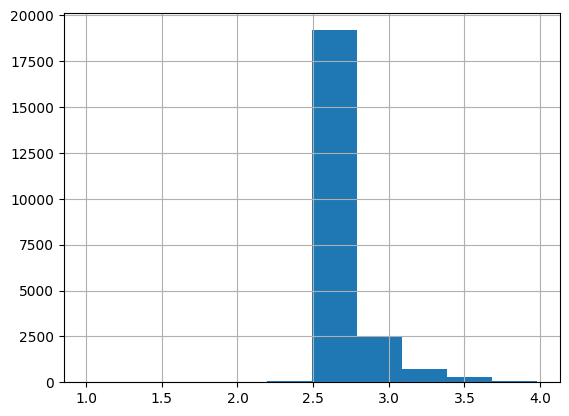

In [42]:
data = data.query('ceiling_height < 4')
data['ceiling_height'].hist()

##### Этаж кваритиры

Высота жилых зданий в Ленобласти и Питере: 1-37 этажей

<Axes: >

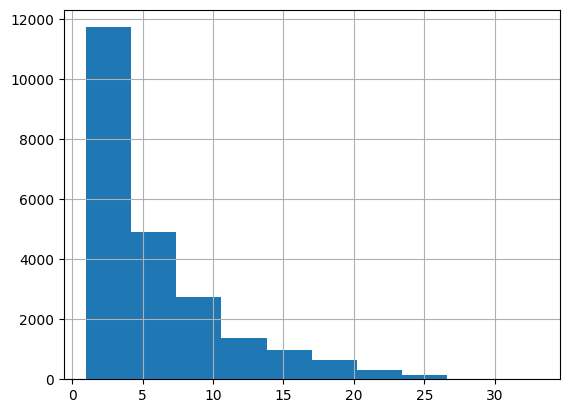

In [43]:
data['floor'].hist()

In [44]:
data['floor'].describe()

count    22783.000000
mean         5.887065
std          4.889932
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

По данным не видно необычных значений

##### Тип этажа квартиры

Данные могут принимать только 3 значения.

<Axes: >

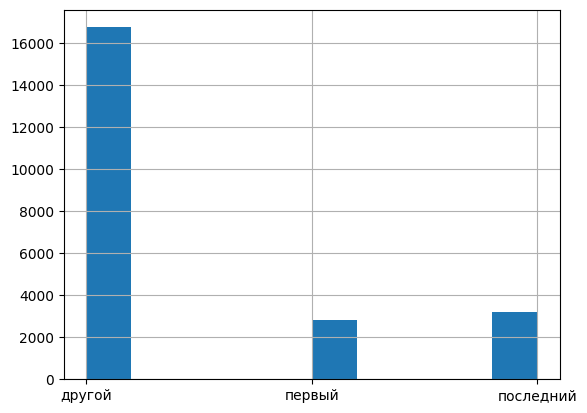

In [45]:
data['floor_type'].hist()

В этих данных также нет ничего примечательного.

##### Общее количество этажей в доме

Высота жилых зданий в Ленобласти и Питере: 1-37 этажей

<Axes: >

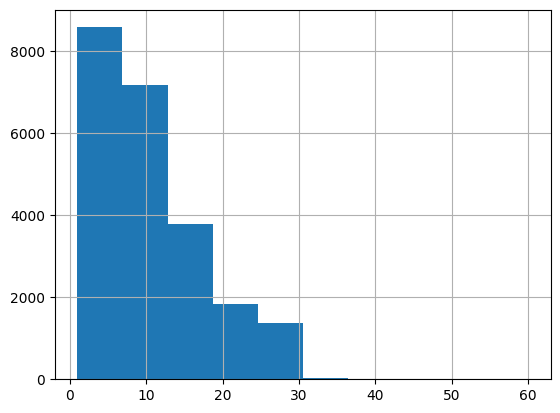

In [46]:
data['floors_total'].hist()

In [47]:
data['floors_total'].describe()

count    22783.000000
mean        10.754905
std          6.630726
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [48]:
data['floors_total'].sort_values().unique()[-30:]

array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
       24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 52, 60])

Самый высокий жилой дом в СПб - 37 этажей, поэтому 52 и 60 - скорее всего относятся к Лахта-Центру, и их учитывать не стоит, поскольку это бизнесс-центр.

<Axes: >

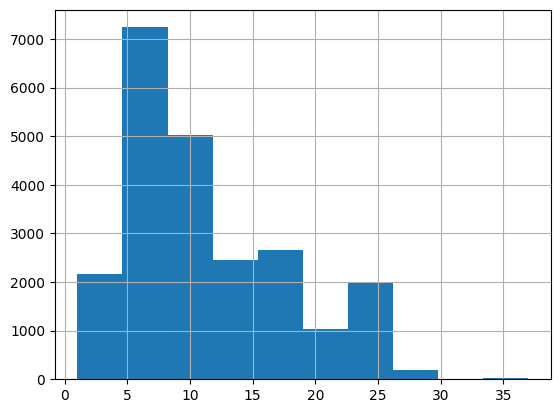

In [49]:
data = data.query('floors_total <= 37')
data['floors_total'].hist()

##### Расстояние до центра города в метрах.

<Axes: >

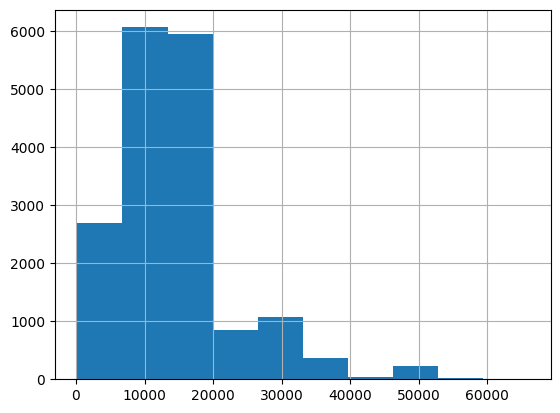

In [50]:
data['city_centers_nearest'].hist()

In [51]:
data['city_centers_nearest'].describe()

count    17305.000000
mean     14523.099335
std       8567.364727
min        208.000000
25%       9866.000000
50%      13290.000000
75%      16464.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [52]:
data['city_centers_nearest'].sort_values().unique()[-30:]

array([52968., 52974., 53028., 53078., 53088., 53104., 53132., 53138.,
       53177., 53294., 53379., 53383., 53568., 54214., 54490., 54646.,
       54926., 56745., 59052., 59626., 60223., 61495., 62454., 62706.,
       64857., 65105., 65764., 65952., 65968.,    nan])

Диаметр Санкт-Петербурга состовляет до 90км, поэтому значения свыше 60км подозрительны, но всё равно их можно считать нормальными.

##### Расстояние до ближайшего аэропорта

<Axes: >

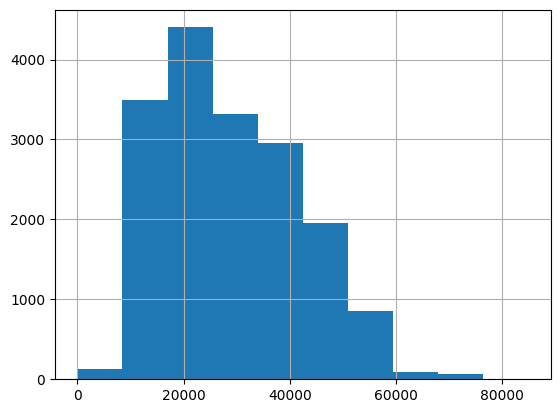

In [53]:
data['airports_nearest'].hist()

In [54]:
data['airports_nearest'].describe()

count    17288.000000
mean     28860.700370
std      12800.592524
min          0.000000
25%      18398.000000
50%      26898.500000
75%      37434.000000
max      84869.000000
Name: airports_nearest, dtype: float64

В данных есть 0 метров до аэропорта. Это значит что квартира находится прямо в аэропорте? Лучше убрать такие данные, и ограничить минимальное расстояние в 5 км.

<Axes: >

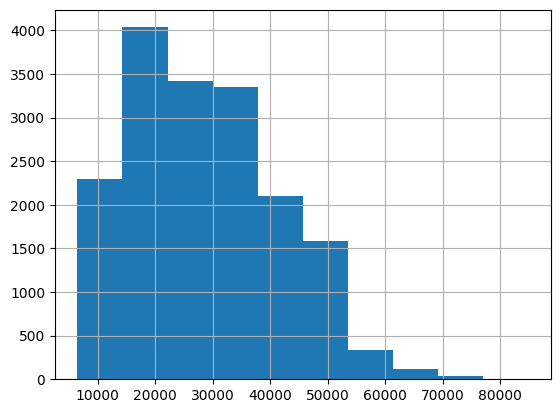

In [55]:
data = data.query('airports_nearest >= 5_000')
data['airports_nearest'].hist()

##### Расстояние до ближайшего парка

<Axes: >

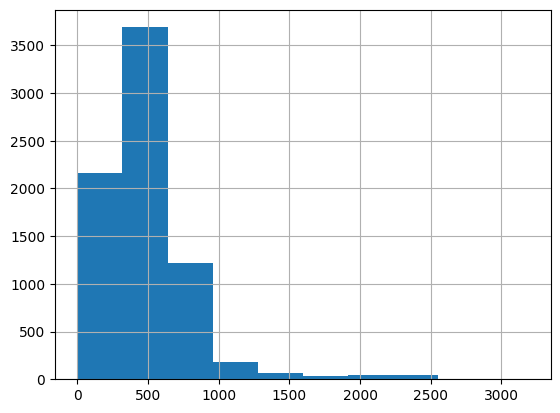

In [56]:
data['parks_nearest'].hist()

In [57]:
data['parks_nearest'].describe()

count    7461.000000
mean      493.492293
std       341.786809
min         1.000000
25%       289.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Мало данных по этому признаку, скорее всего в анализе его учитывать не стоит. Также есть примечательные значения в 1 метре от парка. Скорее всего это значит что дом стоит прямо в парке, но это не аномальное значение.

##### День и месяц публикации объявления

array([[<Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'month'}>]], dtype=object)

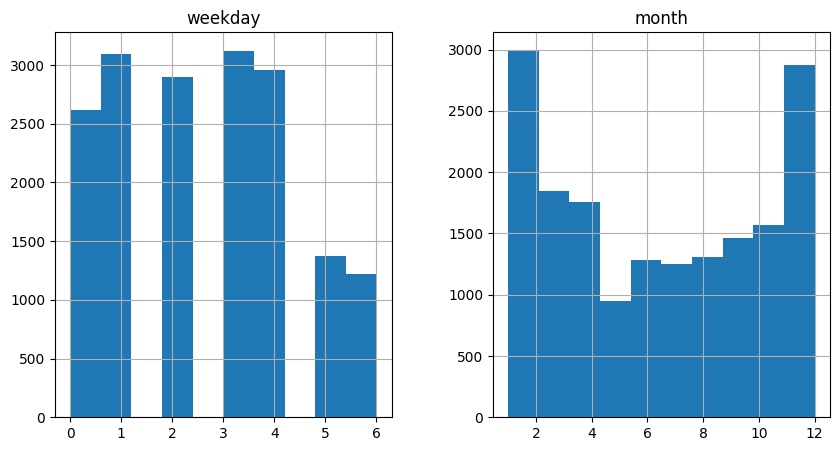

In [58]:
data[['weekday', 'month']].hist(figsize=(10, 5))

Чаще всего объявления размещаются в будние дни и ближе к зиме. В мае и в выходные дни люди не хотят напрягаться и продавать квартиру, потому и такие низкие значения.

#### 4.2. Как быстро продаются квартиры

<Axes: >

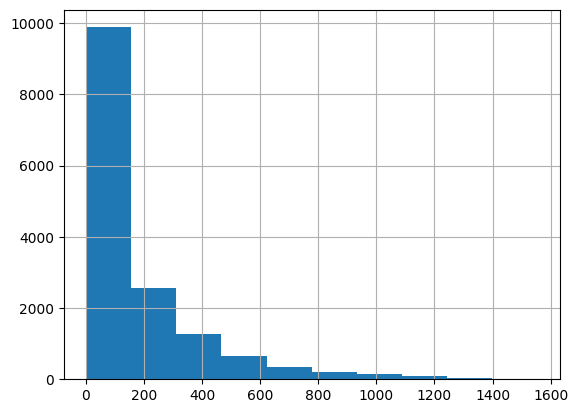

In [59]:
data['days_exposition'].hist()

In [60]:
data['days_exposition'].describe()

count    15191.000000
mean       178.472451
std        219.396331
min          1.000000
25%         42.000000
50%         93.000000
75%        226.000000
max       1553.000000
Name: days_exposition, dtype: float64

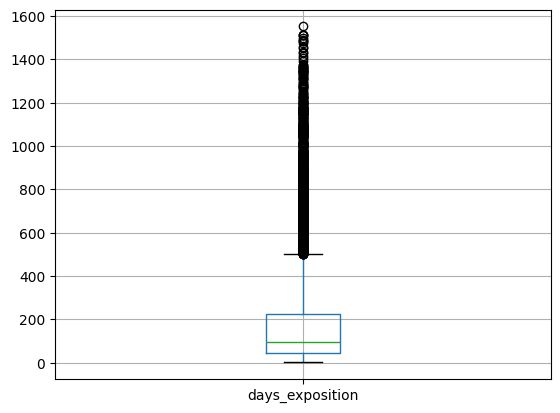

In [61]:
bp = data.boxplot(column=['days_exposition'])

In [62]:
whiskers = [item.get_ydata() for item in bp.get_lines()[2:4]]
whiskers # Крайние значиния усов

[array([226., 502.]), array([1., 1.])]

In [63]:
Q1 = data['days_exposition'].quantile(.25)
Q3 = data['days_exposition'].quantile(.75)
IQR = Q3 - Q1
Q3 + 1.5*IQR

502.0

In [64]:
Q1 - 1.5*IQR

-234.0

Среднее время продажи квартиры - 177 дней, медианное - 93 дня. Поскольку сейчас мы прошли по статистике только квартили, можно оперировать интерквартильными размахами. За необычно быструю продажу можно принять продажу ранее $Q_1 - 1.5 IQR$ - менее чем за день, и необычайно долгая продажа долгая продажа $Q_3 + 1.5 IQR$ - 500 дней и более. Можно также отталкиваться от IQR - соответственно 44 и 226 дней.

#### 4.3. Какие факторы влияют на стоимость

In [65]:
import seaborn as sns
data[['last_price', 'total_area', 'living_area', 
      'kitchen_area', 'rooms']].corr()

,last_price,total_area,living_area,kitchen_area,rooms
last_price,1.000000,0.813043,0.710910,0.616929,0.558213
total_area,0.813043,1.000000,0.933212,0.580175,0.798628
living_area,0.710910,0.933212,1.000000,0.363753,0.870873
kitchen_area,0.616929,0.580175,0.363753,1.000000,0.243301
rooms,0.558213,0.798628,0.870873,0.243301,1.000000


У всех параметров - общая площадь, жилая площадь, площадь кухни и количество комнат, наблюдается сильная положительная корреляция с ценой. Чем больше все эти параметры, тем выше цена за квартиру, это можно сказать наверняка. 

<Axes: xlabel='last_price', ylabel='total_area'>

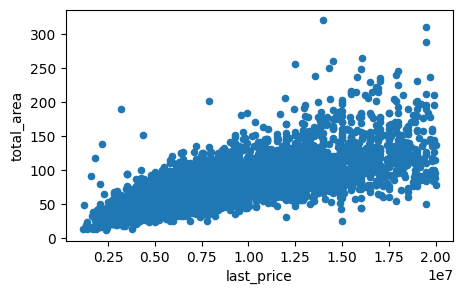

In [66]:
data.plot('last_price', 'total_area', kind='scatter', figsize=(5,3))

<Axes: xlabel='last_price', ylabel='living_area'>

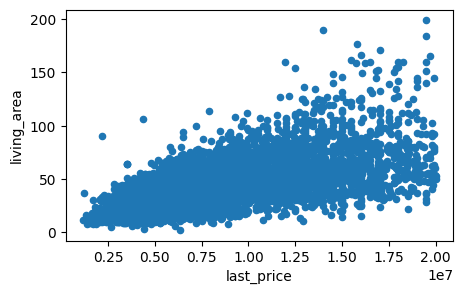

In [67]:
data.plot('last_price', 'living_area', kind='scatter', figsize=(5,3))

<Axes: xlabel='last_price', ylabel='kitchen_area'>

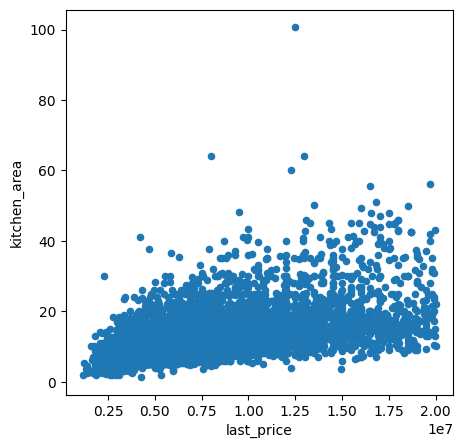

In [68]:
data.plot('last_price', 'kitchen_area', kind='scatter', figsize=(5,5))

<Axes: xlabel='last_price', ylabel='rooms'>

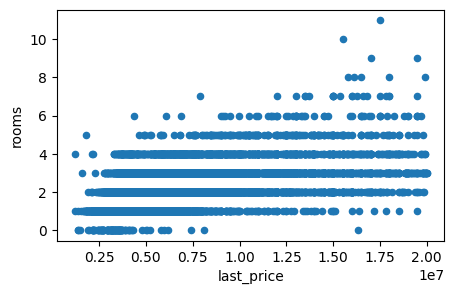

In [69]:
data.plot('last_price', 'rooms', kind='scatter', figsize=(5,3))

Графики почти подтверждают теорию: цена не очень сильно зависит от площади кухни. Также количество комнат определяет минимальную цену квартиры

In [70]:
data.groupby('floor_type')['last_price'].describe()

,count,mean,std,min,25%,50%,75%,max
floor_type,,,,,,,,
другой,13180.0,6.265586e+06,3.224784e+06,1650000.0,4050000.0,5250000.0,7400000.0,19999000.0
первый,1935.0,5.243923e+06,2.543399e+06,1190000.0,3600000.0,4570000.0,6000000.0,19713740.0
последний,2172.0,6.210198e+06,3.410949e+06,1800000.0,3900000.0,5000000.0,7490000.0,19900000.0


Видно, что если этаж первый это отрицательно влияет на цену квартиры. Вероятно, на это влияют одноэтажные здания, нужно посмотреть, что будет, если их исключить.

In [71]:
data[data['floors_total'] > 1].groupby('floor_type')['last_price'].describe()

,count,mean,std,min,25%,50%,75%,max
floor_type,,,,,,,,
другой,13180.0,6.265586e+06,3.224784e+06,1650000.0,4050000.0,5250000.0,7400000.0,19999000.0
первый,1935.0,5.243923e+06,2.543399e+06,1190000.0,3600000.0,4570000.0,6000000.0,19713740.0
последний,2166.0,6.214065e+06,3.413142e+06,1800000.0,3900000.0,5000000.0,7490000.0,19900000.0


Это повлияло только на данные с последних этажей, видимо из-за моей реализации понятия первого и последнего этажей. Значит квартиры на первом этаже многоэтажек действительно стоят дешевле

floor_type
другой       Axes(0.125,0.11;0.775x0.77)
первый       Axes(0.125,0.11;0.775x0.77)
последний    Axes(0.125,0.11;0.775x0.77)
Name: last_price, dtype: object

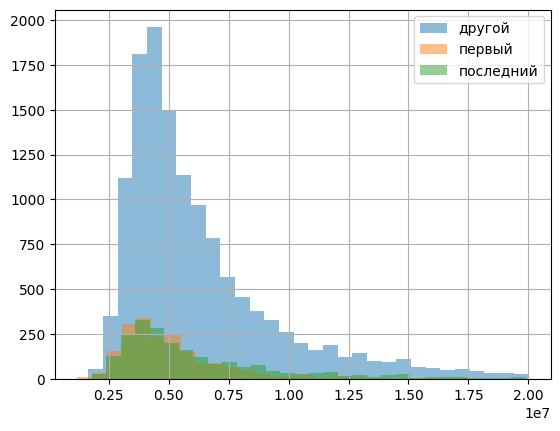

In [72]:
data.groupby('floor_type')['last_price'].hist(bins=30, legend=True, alpha=0.5)

График в данном случае анализировать сложнее, здесь не так явно заметна зависимость.

In [73]:
data.groupby('weekday')['last_price'].describe()[['count', 'mean']]

,count,mean
weekday,,
0,2621.0,6.118017e+06
1,3095.0,6.195088e+06
2,2899.0,6.224019e+06
3,3123.0,6.269323e+06
4,2954.0,6.035371e+06
5,1372.0,6.024971e+06
6,1223.0,5.960400e+06


День недели для выставки на продажу не сильно влияет на цену квартиры. Тем не менее, квартиры, продающиеся в выходные в среднем чуть дешевле.

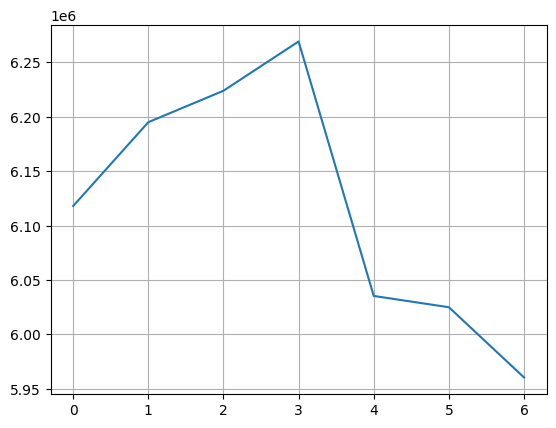

In [74]:
plt.plot(data.groupby('weekday')['last_price'].describe()[['count', 'mean']].reset_index()['mean'])
plt.grid(True)

In [75]:
data.groupby('weekday')['last_price'].describe()[['count', 'mean']].reset_index()['mean']

0    6.118017e+06
1    6.195088e+06
2    6.224019e+06
3    6.269323e+06
4    6.035371e+06
5    6.024971e+06
6    5.960400e+06
Name: mean, dtype: float64

По графику все дни имеют приблизительно одинаковое среднее, но в выходные цена чуть ниже.

In [76]:
data.groupby('month')['last_price'].describe()[['count', 'mean']]

,count,mean
month,,
1,1056.0,6.185574e+06
2,1936.0,6.121114e+06
3,1846.0,6.174703e+06
4,1756.0,6.274050e+06
5,946.0,6.042210e+06
6,1283.0,5.876062e+06
7,1250.0,6.145290e+06
8,1307.0,6.110079e+06
9,1463.0,6.328519e+06


Месяц также не сильно влияет на цену продажи. Летом цены на квартиры немного снежаются (особенно в июне), а потом постепенно возвращаются к норме осенью. Самые выгодные месяцы для продажи - апрель и сентябрь

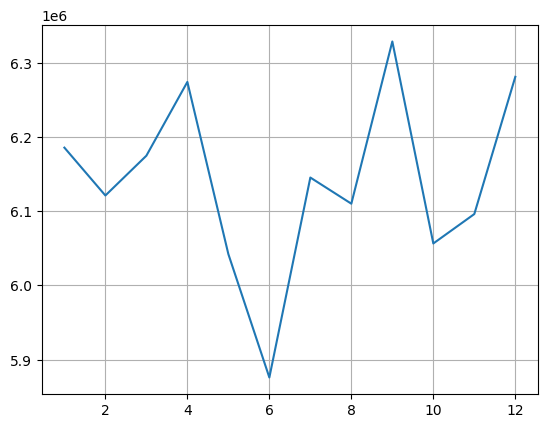

In [77]:
means = []
for i, label in enumerate(data['month'].sort_values().unique()):
    means.append(data.query('month == @label')['last_price'].mean())
plt.plot(data['month'].sort_values().unique(), means)
plt.grid(True)

Наблюдения подтверждаются графиком

In [78]:
data.groupby('year')['last_price'].describe()[['count', 'mean']]

,count,mean
year,,
2014,94.0,9.053895e+06
2015,881.0,6.823421e+06
2016,2048.0,6.086447e+06
2017,6130.0,5.969250e+06
2018,6031.0,6.086059e+06
2019,2103.0,6.463098e+06


Самые высокие цены на квартиры были в 2014 и 2015 годах, поскольку тогда продавалось мало квартир. Далее они повышаются только в 2019 году.

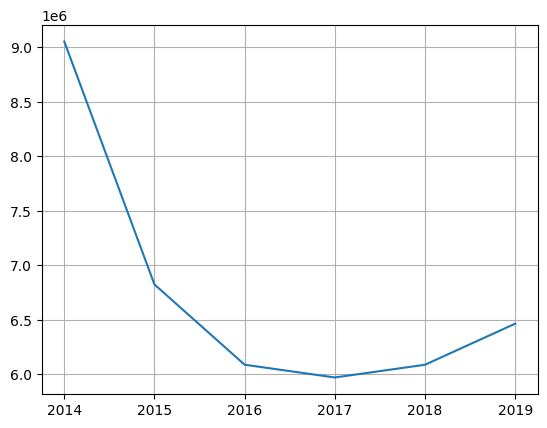

In [79]:
means = []
for i, label in enumerate(data['year'].sort_values().unique()):
    means.append(data.query('year == @label')['last_price'].mean())
plt.plot(data['year'].sort_values().unique(), means)
plt.grid(True)

Здесь также наблюдения подтверждены графиком.

#### 4.4. Средняя цена за квадратный метр в 10 населённых пунктах

In [80]:
(data
    .pivot_table(index='clean_locality_name', 
                 values='price_per_square_metre', 
                 aggfunc=['mean', 'count'])
    .sort_values(('count', 'price_per_square_metre'), ascending=False)
    .head(10)
)

,mean,count
,price_per_square_metre,price_per_square_metre
clean_locality_name,,
Санкт-Петербург,108451.720711,14834
Шушары,78474.361743,436
Пушкин,101715.698217,359
Колпино,75310.879524,336
Парголово,90175.913089,327
Петергоф,84290.765678,199
Сестрорецк,100974.372597,181
Красное Село,71834.389302,172


Самая высокая средняя цена за $м^2$ - в Санкт-Петербурге, 108.5 тысяч за $м^2$.

Самая низкая средняя цена за $м^2$ - в Выборге, 51.1 тысяча за $м^2$.

Так совпало, что это 1-ый и 10-й город по количеству объявлений, но зависимость цены $м^2$ от количества объявлений не прямая - 6-е место по количеству объявлений занимает город со 2-м местом по стоимости квадратного места: Пушкин.

#### 4.5. Средняя цена каждого километра.

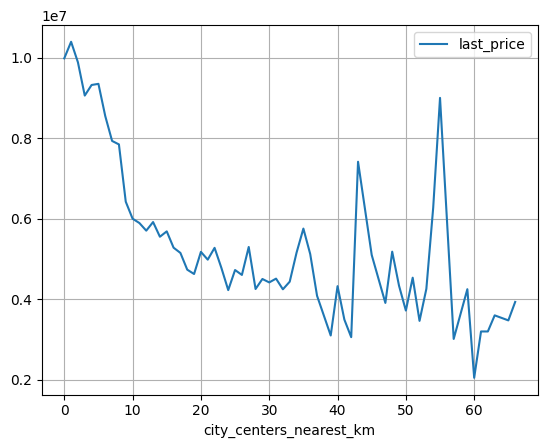

In [81]:
kilometer_price_table = data.pivot_table(index='city_centers_nearest_km', values='last_price')
kilometer_price_table.plot()
plt.grid(True)

В черте города - чем ближе к центру, тем выше средняя цена за жильё. Если смотреть на 40 километров и дальше от центра города - данные становятся слишком шумными, для того чтобы делать какие-либо выводы.

#### Вывод

Были изменены или удалены аномальные значения которые находились в таблице. 

Также было выведено число дней для аномально быстрой и медленной продажи - соответственно <44 и >226 дней (или <1 и >500 дней).

На стоимость прямо влияют: общая площадь, жилая площадь, количество комнат, незначительно - площадь кухни. Квартиры на первом и последнем этаже в среднем дешевле остальных. Квартиры с большей стоимостью размещаются в будни, ниже всего средняя цена квартиры в июне, и выше всего - в сентябре. Квартиры продавались дешевле с каждым новым годом кроме 2019. 

Среди 10 самых популярных населённых пунктов, стоимость квадратного метра выше всего в СПб (108 тыс), и ниже всего в Выборге (58 тыс).

До 40 километров от центра - километраж влияет на стоимость жилья. Чем ближе к центру, тем дороже. Дальше 40 километров зависимости нет.

### Общий вывод

Было проведено исследование стоимости жилья в Санкт-Петербурге и Ленобласти за 2014-2019 года. На стоимость жилья влияют следующие факторы: 
* В каком населённом пункте находится жильё (Среди 10 самых популярных населённых пунктов, наибольшая средняя стоимость квадратного метра - в СПб и Пушкине, около 100 тыс, но зависимость не очевидная, нельзя отталкиваться только от популярности города по размещённым объявлениям)
* Дальность от центра города (В СПб: в пределах 40 км от центра города, чем больше расстояние от него, тем ниже средняя цена, вплоть до 60% разницы в цене)
* Общая площадь, жилая площадь, площадь кухни (От площадей сильно зависит цена квартиры, в основном квадратный метр стоит 86-116 тысяч)
* Количество комнат (Чаще всего обозначают минимальное количество комнат, студии крайне редко бывают дороже 5 млн, а минимальная стоимость 1-4 комнатных квартир различаются примерно на 500 тыс попарно)
* День недели размещения объявления (в будни дороже, размещённые в четверг объявления в среднем продаются на 8-10% чем в субботу)
* На каком этаже находится квартира (первый этаж дешевле в среднем на 20%, чем все остальные этажи)
* Месяц размещения объявления (дешевле всего в июнь, дороже всего в сентябре, разница в 5-8% цены)
* Год продажи (чем позже квартира продаётся, тем дешевле, исключая 2019 год, максимальная разница в средней цене между годами - 30%)

Чаще всего квартиры продаются за 44-226 дней (очень редко <1 и >500 дней).
В исследовании не учитывалось, является ли помещение апартаментами, или жилым помещением, насколько далеко находится квартира от точек интереса - аэропорта, центра города, прудов, парков, количество балконов, как зависит длительность продажи от стоимости объявления, высотность здания (количество этажей). Возможно эти данные влияют на цену/цена влияет на них, поэтому стоит это проверить в дальнейшем.